# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from IPython.display import Image, display
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent import AnomalyAgent

pd.set_option("display.max_colwidth", None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(1000, 3, anomaly_config=anomaly_cfg)
df.head()

{'enabled': True, 'fraction': 0.02, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.156880,0.844563,0.003710
1,2020-01-02,0.448555,0.783839,3.242053
2,2020-01-03,0.129466,0.962014,0.601937
3,2020-01-04,0.598984,0.835504,0.116811
4,2020-01-05,0.202648,0.342755,0.449409


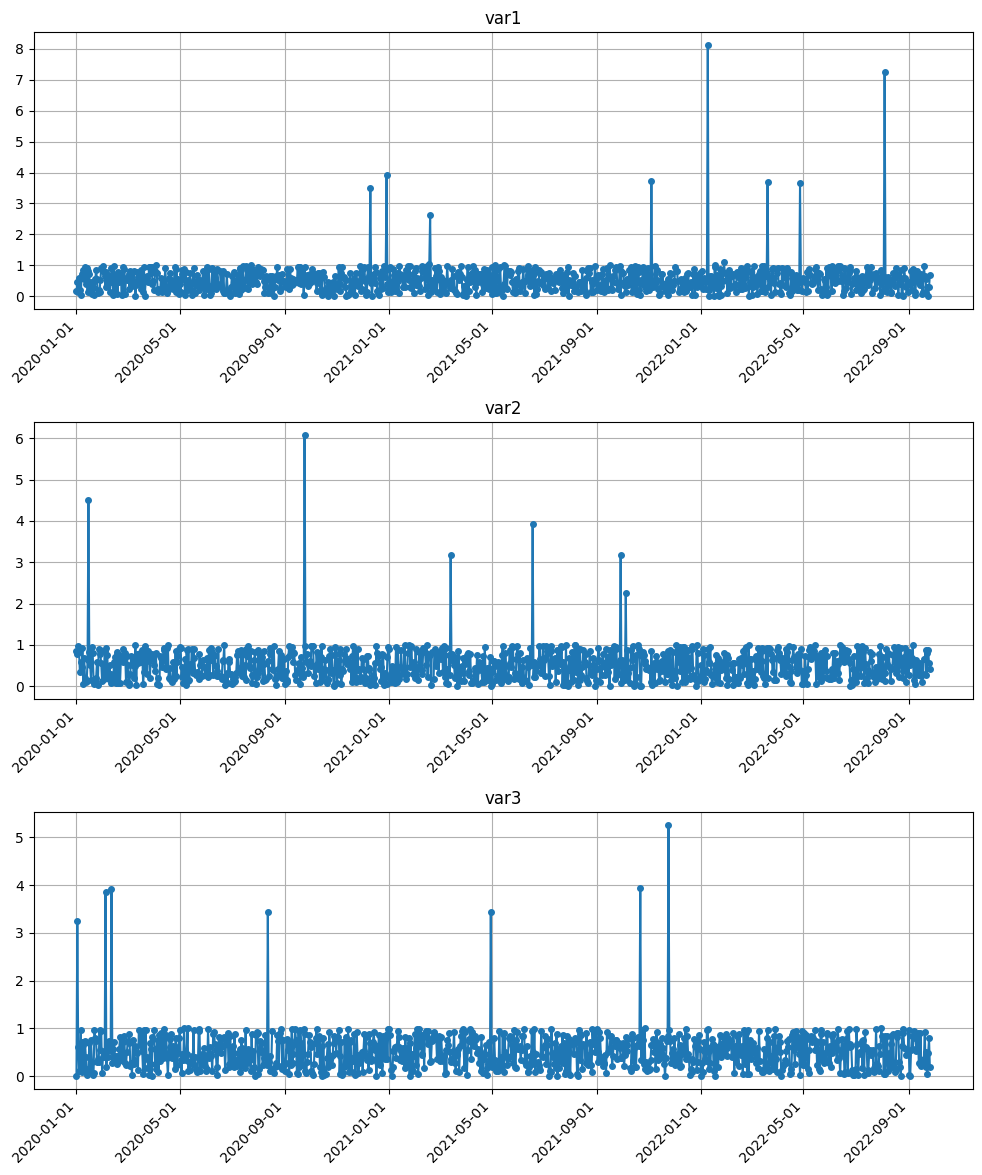

In [3]:
# plot the data
plot_df(df)

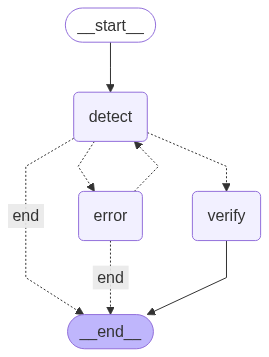

In [4]:
# create anomaly agent
anomaly_agent = AnomalyAgent(debug=True)

# Display the graph in Mermaid format
display(Image(anomaly_agent.app.get_graph().draw_mermaid_png()))

In [5]:
# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# print anomalies
print(anomalies)

2025-08-17 21:55:38,874 - anomaly_agent.agent.AnomalyAgent - DEBUG - Processing column: var1
2025-08-17 21:55:38,874 - anomaly_agent.agent.AnomalyAgent - DEBUG - Created state for var1, starting graph execution...
2025-08-17 21:55:38,925 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Processing var1
2025-08-17 21:56:01,698 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Found 7 anomalies, next step: verify
2025-08-17 21:56:16,532 - anomaly_agent.agent.AnomalyAgent - DEBUG - Graph execution completed for var1
2025-08-17 21:56:16,533 - anomaly_agent.agent.AnomalyAgent - DEBUG - Found 7 verified anomalies for var1
2025-08-17 21:56:16,533 - anomaly_agent.agent.AnomalyAgent - DEBUG - Processing column: var2
2025-08-17 21:56:16,534 - anomaly_agent.agent.AnomalyAgent - DEBUG - Created state for var2, starting graph execution...
2025-08-17 21:56:16,537 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Processing var2
2025-08-17 21:57:06,450 - anomaly_agent

{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2022-01-09', variable_value=8.131964, anomaly_description='Extreme outlier for var1; value far above observed range; likely data error or sensor fault; isolated without nearby justification.'), Anomaly(timestamp='2021-08-04', variable_value=7.248978, anomaly_description='Significantly elevated spike in var1; isolated outlier not aligned with seasonal/pattern expectations; potential data quality issue.'), Anomaly(timestamp='2020-12-10', variable_value=3.506027, anomaly_description='Isolated spike in var1; value well above typical 0–1 range; potential measurement error.'), Anomaly(timestamp='2020-12-29', variable_value=3.92598, anomaly_description='Isolated spike in var1 around year-end; outlier relative to neighboring points; possible data corruption.'), Anomaly(timestamp='2021-11-04', variable_value=3.711699, anomaly_description='High outlier in var1; no nearby pattern; potential data quality issue.'), Anomaly(timestamp='2022-03-20', v

In [6]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.sample(10)

,timestamp,variable_name,variable_value,anomaly_description
4,2021-11-04,var1,3.711699,High outlier in var1; no nearby pattern; potential data quality issue.
9,2021-03-14,var2,3.164296,Sudden spike in var2; isolated high value relative to neighboring days; verify data source.
5,2022-03-20,var1,3.704904,Spike in var1; isolated outlier; possible measurement error.
10,2021-06-18,var2,3.929183,Spike in var2; value around 3.93; outlier beyond normal distribution; investigate potential event or sensor issue.
2,2020-12-10,var1,3.506027,Isolated spike in var1; value well above typical 0–1 range; potential measurement error.
1,2021-08-04,var1,7.248978,Significantly elevated spike in var1; isolated outlier not aligned with seasonal/pattern expectations; potential data quality issue.
11,2020-01-02,var3,3.242053,"Statistical outlier: var3 spikes to 3.242053, far above the typical 0-1 range. Isolated spike with neighboring values around 0.0–0.6. Not part of regular pattern or gradual trend; likely data quality issue or sensor/glitch."
3,2020-12-29,var1,3.925980,Isolated spike in var1 around year-end; outlier relative to neighboring points; possible data corruption.
13,2020-02-11,var3,3.921665,Statistical outlier: var3 spikes to 3.921665; isolated spike with adjacent values ~0.28–0.54. Not explained by trend or seasonality; high likelihood of data quality issue.
15,2021-04-30,var3,3.428220,Statistical outlier: var3 spikes to 3.428220; isolated against adjacent values (~0.18–0.48). Not part of known pattern; investigate data capture/measurement integrity.


In [7]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")
df_anomalies_wide.sample(10)

,timestamp,var1_anomaly_description,var2_anomaly_description,var3_anomaly_description,var1_variable_value,var2_variable_value,var3_variable_value
3,2020-02-11,NaN,NaN,Statistical outlier: var3 spikes to 3.921665; isolated spike with adjacent values ~0.28–0.54. Not explained by trend or seasonality; high likelihood of data quality issue.,NaN,NaN,3.921665
11,2021-08-04,Significantly elevated spike in var1; isolated outlier not aligned with seasonal/pattern expectations; potential data quality issue.,NaN,NaN,7.248978,NaN,NaN
7,2020-12-29,Isolated spike in var1 around year-end; outlier relative to neighboring points; possible data corruption.,NaN,NaN,3.925980,NaN,NaN
0,2020-01-02,NaN,NaN,"Statistical outlier: var3 spikes to 3.242053, far above the typical 0-1 range. Isolated spike with neighboring values around 0.0–0.6. Not part of regular pattern or gradual trend; likely data quality issue or sensor/glitch.",NaN,NaN,3.242053
5,2020-09-24,NaN,Extreme spike in var2; value far above typical range; verify data integrity and sensor status.,NaN,NaN,6.084901,NaN
15,2022-03-20,Spike in var1; isolated outlier; possible measurement error.,NaN,NaN,3.704904,NaN,NaN
14,2022-01-09,Extreme outlier for var1; value far above observed range; likely data error or sensor fault; isolated without nearby justification.,NaN,NaN,8.131964,NaN,NaN
6,2020-12-10,Isolated spike in var1; value well above typical 0–1 range; potential measurement error.,NaN,NaN,3.506027,NaN,NaN
9,2021-04-30,NaN,NaN,Statistical outlier: var3 spikes to 3.428220; isolated against adjacent values (~0.18–0.48). Not part of known pattern; investigate data capture/measurement integrity.,NaN,NaN,3.428220
13,2021-11-24,NaN,NaN,"Severe outlier: var3 spikes to 5.260598, well beyond prior spikes (3–4). Isolated event with nearby values ~0.05–0.96. Requires urgent investigation for data quality or potential system issue.",NaN,NaN,5.260598


In [8]:
# merge anomalies with original data
df_final = df.merge(
    df_anomalies_wide,
    on="timestamp",
    how="left",
    suffixes=("", "_anomaly_flag"),
)

df_final.head()

ValueError: You are trying to merge on datetime64[ns] and object columns for key 'timestamp'. If you wish to proceed you should use pd.concat

In [ ]:
# plot final data with anomalies
plot_df(df_final)